# Tech Challenge - Fase 2

O Tech Challenge é o projeto que englobará os conhecimentos obtidos em todas as disciplinas da fase. Esta é uma atividade que, em princípio, deve ser desenvolvida em grupo. Importante atentar-se ao prazo de entrega, pois trata-se de uma atividade obrigatória, uma vez que sua pontuação se refere a 90% da nota final.

## O problema

Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.
Dados
Utilize os dados históricos do índice IBOVESPA, disponíveis publicamente: https://br.investing.com/indices/bovespa-historical-data
Requisitos:
• Selecione o período “diário”.
• Baixe um intervalo de pelo menos 2 anos de dados.
• Realize o pré-processamento necessário para utilizar os dados no modelo.

## Objetivo
Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual

# Aquisição, Tratamento e Exploração dos Dados

Os dados foram adquiridos a partir de um arquivo CSV chamado
dados_historicos_ibovespa.csv e carregados em um DataFrame pandas,
df_ibovespa.

O DataFrame inicialmente continha 4954 linhas e 7 colunas, abrangendo
um período de 10 de julho de 2025 a 11 de julho de 2005.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
Ibovespa = pd.read_csv('/content/Dados Históricos - Ibovespa.csv')
Ibovespa

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,10.07.2025,136.743,137.472,137.472,136.014,"9,57M","-0,54%"
1,09.07.2025,137.481,139.303,139.331,137.299,"7,58B","-1,31%"
2,08.07.2025,139.303,139.491,139.591,138.770,"6,75B","-0,13%"
3,07.07.2025,139.490,141.265,141.342,139.295,"6,12B","-1,26%"
4,04.07.2025,141.264,140.928,141.564,140.597,"3,31B","0,24%"
...,...,...,...,...,...,...,...
4949,15.07.2005,25.222,25.916,25.916,25.222,"72,88M","-2,69%"
4950,14.07.2005,25.920,25.859,26.142,25.725,"113,35M","0,25%"
4951,13.07.2005,25.856,25.557,26.043,25.557,"107,28M","1,25%"
4952,12.07.2005,25.536,25.027,25.576,24.932,"94,91M","2,08%"


In [3]:
# Tratando as Datas, para podermos trabalhar o modelo com base nos dias
Ibovespa['Data'] = pd.to_datetime(Ibovespa['Data'], format='%d.%m.%Y')
Ibovespa = Ibovespa.sort_values(by='Data', ascending=True).reset_index(drop=True)
Ibovespa

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2005-07-11,25.016,24.425,25.032,24.425,"100,42M","2,43%"
1,2005-07-12,25.536,25.027,25.576,24.932,"94,91M","2,08%"
2,2005-07-13,25.856,25.557,26.043,25.557,"107,28M","1,25%"
3,2005-07-14,25.920,25.859,26.142,25.725,"113,35M","0,25%"
4,2005-07-15,25.222,25.916,25.916,25.222,"72,88M","-2,69%"
...,...,...,...,...,...,...,...
4949,2025-07-04,141.264,140.928,141.564,140.597,"3,31B","0,24%"
4950,2025-07-07,139.490,141.265,141.342,139.295,"6,12B","-1,26%"
4951,2025-07-08,139.303,139.491,139.591,138.770,"6,75B","-0,13%"
4952,2025-07-09,137.481,139.303,139.331,137.299,"7,58B","-1,31%"


In [4]:
Ibovespa['Vol.'].unique()

array(['100,42M', '94,91M', '107,28M', ..., '6,12B', '6,75B', '7,58B'],
      dtype=object)

In [5]:
#Criando uma Coluna para separa o Volume -  milhoes e bilhoes - em colunas diferentes. Eu realmente nao sei se o volume é estatisticamente significante para o modelo, entao vale a pena deixar organizado
#Criando as colunas
Ibovespa['Milhoes'] = 0.0
Ibovespa['Bilhoes'] = 0.0
for index, row in Ibovespa.iterrows():
    volume_str = str(row['Vol.'])
    if 'M' in volume_str:
        # Remover 'M', substituir "," por "."", converter em float
        value = float(volume_str.replace('M', '').replace(',', '.'))
        Ibovespa.loc[index, 'Milhoes'] = value
    elif 'B' in volume_str:
        # Remover 'B',  substituir "," por "."", converter em float
        value = float(volume_str.replace('B', '').replace(',', '.'))
        Ibovespa.loc[index, 'Bilhoes'] = value

Ibovespa

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Milhoes,Bilhoes
0,2005-07-11,25.016,24.425,25.032,24.425,"100,42M","2,43%",100.42,0.00
1,2005-07-12,25.536,25.027,25.576,24.932,"94,91M","2,08%",94.91,0.00
2,2005-07-13,25.856,25.557,26.043,25.557,"107,28M","1,25%",107.28,0.00
3,2005-07-14,25.920,25.859,26.142,25.725,"113,35M","0,25%",113.35,0.00
4,2005-07-15,25.222,25.916,25.916,25.222,"72,88M","-2,69%",72.88,0.00
...,...,...,...,...,...,...,...,...,...
4949,2025-07-04,141.264,140.928,141.564,140.597,"3,31B","0,24%",0.00,3.31
4950,2025-07-07,139.490,141.265,141.342,139.295,"6,12B","-1,26%",0.00,6.12
4951,2025-07-08,139.303,139.491,139.591,138.770,"6,75B","-0,13%",0.00,6.75
4952,2025-07-09,137.481,139.303,139.331,137.299,"7,58B","-1,31%",0.00,7.58


In [6]:
#Calculando a variação do dia anterior
Ibovespa['Fechamento_Amanha'] = Ibovespa['Último'].shift(1)
Ibovespa

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Milhoes,Bilhoes,Fechamento_Amanha
0,2005-07-11,25.016,24.425,25.032,24.425,"100,42M","2,43%",100.42,0.00,NaN
1,2005-07-12,25.536,25.027,25.576,24.932,"94,91M","2,08%",94.91,0.00,25.016
2,2005-07-13,25.856,25.557,26.043,25.557,"107,28M","1,25%",107.28,0.00,25.536
3,2005-07-14,25.920,25.859,26.142,25.725,"113,35M","0,25%",113.35,0.00,25.856
4,2005-07-15,25.222,25.916,25.916,25.222,"72,88M","-2,69%",72.88,0.00,25.920
...,...,...,...,...,...,...,...,...,...,...
4949,2025-07-04,141.264,140.928,141.564,140.597,"3,31B","0,24%",0.00,3.31,140.928
4950,2025-07-07,139.490,141.265,141.342,139.295,"6,12B","-1,26%",0.00,6.12,141.264
4951,2025-07-08,139.303,139.491,139.591,138.770,"6,75B","-0,13%",0.00,6.75,139.490
4952,2025-07-09,137.481,139.303,139.331,137.299,"7,58B","-1,31%",0.00,7.58,139.303


In [7]:
#Criando a coluna 'Tendência_Fechamento'
Ibovespa_cleaned = Ibovespa.dropna(subset=['Fechamento_Amanha']).copy()
Ibovespa_cleaned['Tendência_Fechamento'] = (Ibovespa_cleaned['Fechamento_Amanha'] > Ibovespa_cleaned['Último']).astype(int)
Ibovespa = Ibovespa_cleaned
Ibovespa

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Milhoes,Bilhoes,Fechamento_Amanha,Tendência_Fechamento
1,2005-07-12,25.536,25.027,25.576,24.932,"94,91M","2,08%",94.91,0.00,25.016,0
2,2005-07-13,25.856,25.557,26.043,25.557,"107,28M","1,25%",107.28,0.00,25.536,0
3,2005-07-14,25.920,25.859,26.142,25.725,"113,35M","0,25%",113.35,0.00,25.856,0
4,2005-07-15,25.222,25.916,25.916,25.222,"72,88M","-2,69%",72.88,0.00,25.920,1
5,2005-07-18,25.321,25.222,25.412,24.916,"52,17M","0,39%",52.17,0.00,25.222,0
...,...,...,...,...,...,...,...,...,...,...,...
4949,2025-07-04,141.264,140.928,141.564,140.597,"3,31B","0,24%",0.00,3.31,140.928,0
4950,2025-07-07,139.490,141.265,141.342,139.295,"6,12B","-1,26%",0.00,6.12,141.264,1
4951,2025-07-08,139.303,139.491,139.591,138.770,"6,75B","-0,13%",0.00,6.75,139.490,1
4952,2025-07-09,137.481,139.303,139.331,137.299,"7,58B","-1,31%",0.00,7.58,139.303,1


In [8]:
#Filtrando apenas as colunas necessarias para ver o que dá
df = (
    Ibovespa
    .rename(columns= {"Máxima": "Maxima", "Mínima": "Minima", "Último": "Fechamento", "Tendência_Fechamento":"Tendencia"})
    .filter(items=['Data','Fechamento', 'Abertura', 'Maxima', 'Minima', 'Milhoes', 'Bilhoes', 'Tendencia'])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4953 entries, 1 to 4953
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        4953 non-null   datetime64[ns]
 1   Fechamento  4953 non-null   float64       
 2   Abertura    4953 non-null   float64       
 3   Maxima      4953 non-null   float64       
 4   Minima      4953 non-null   float64       
 5   Milhoes     4953 non-null   float64       
 6   Bilhoes     4953 non-null   float64       
 7   Tendencia   4953 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 348.3 KB


In [9]:
#Trabalhando a coluna milhoes, multiplicando todas as linhas por 1000000
df['Milhoes'] = df['Milhoes']*1000000
df.head()

,Data,Fechamento,Abertura,Maxima,Minima,Milhoes,Bilhoes,Tendencia
1,2005-07-12,25.536,25.027,25.576,24.932,94910000.0,0.0,0
2,2005-07-13,25.856,25.557,26.043,25.557,107280000.0,0.0,0
3,2005-07-14,25.920,25.859,26.142,25.725,113350000.0,0.0,0
4,2005-07-15,25.222,25.916,25.916,25.222,72880000.0,0.0,1
5,2005-07-18,25.321,25.222,25.412,24.916,52170000.0,0.0,0


In [10]:
#Trabalhando a coluna bilhoes, multiplicando todas as linhas por 1000000000
df['Bilhoes'] = df['Bilhoes']*1000000000
df.head()

,Data,Fechamento,Abertura,Maxima,Minima,Milhoes,Bilhoes,Tendencia
1,2005-07-12,25.536,25.027,25.576,24.932,94910000.0,0.0,0
2,2005-07-13,25.856,25.557,26.043,25.557,107280000.0,0.0,0
3,2005-07-14,25.920,25.859,26.142,25.725,113350000.0,0.0,0
4,2005-07-15,25.222,25.916,25.916,25.222,72880000.0,0.0,1
5,2005-07-18,25.321,25.222,25.412,24.916,52170000.0,0.0,0


In [11]:
#Utilizando um join para juntar as colunas, e criando uma unica coluna chamada "Volume"
df['Volume'] = df['Milhoes'] + df['Bilhoes']
df.head()

,Data,Fechamento,Abertura,Maxima,Minima,Milhoes,Bilhoes,Tendencia,Volume
1,2005-07-12,25.536,25.027,25.576,24.932,94910000.0,0.0,0,94910000.0
2,2005-07-13,25.856,25.557,26.043,25.557,107280000.0,0.0,0,107280000.0
3,2005-07-14,25.920,25.859,26.142,25.725,113350000.0,0.0,0,113350000.0
4,2005-07-15,25.222,25.916,25.916,25.222,72880000.0,0.0,1,72880000.0
5,2005-07-18,25.321,25.222,25.412,24.916,52170000.0,0.0,0,52170000.0


In [12]:
#Excluindo as colunas Milhoes e Bilhoes
df = df.drop(['Milhoes', 'Bilhoes'], axis=1)
df.head()

,Data,Fechamento,Abertura,Maxima,Minima,Tendencia,Volume
1,2005-07-12,25.536,25.027,25.576,24.932,0,94910000.0
2,2005-07-13,25.856,25.557,26.043,25.557,0,107280000.0
3,2005-07-14,25.920,25.859,26.142,25.725,0,113350000.0
4,2005-07-15,25.222,25.916,25.916,25.222,1,72880000.0
5,2005-07-18,25.321,25.222,25.412,24.916,0,52170000.0


In [13]:
#Estabelecendo a coluna data como indice
df_ibovespa = df.set_index('Data')
df_ibovespa.head()

,Fechamento,Abertura,Maxima,Minima,Tendencia,Volume
Data,,,,,,
2005-07-12,25.536,25.027,25.576,24.932,0,94910000.0
2005-07-13,25.856,25.557,26.043,25.557,0,107280000.0
2005-07-14,25.920,25.859,26.142,25.725,0,113350000.0
2005-07-15,25.222,25.916,25.916,25.222,1,72880000.0
2005-07-18,25.321,25.222,25.412,24.916,0,52170000.0


## Normalizacao dos Dados

In [14]:
from sklearn.preprocessing import MinMaxScaler

def normalize_columns(df, columns):
  """
  Normalizes the specified columns of a DataFrame using Min-Max scaling.

  Args:
    df: pandas DataFrame.
    columns: List of column names to normalize.

  Returns:
    DataFrame with normalized columns.
  """
  scaler = MinMaxScaler()
  df[columns] = scaler.fit_transform(df[columns])
  return df

In [15]:
#Normalizar as colunas Fechamento, abertura, maxima, minima e volume
df_ibovespa= normalize_columns(df_ibovespa, ['Fechamento', 'Abertura', 'Maxima', 'Minima', 'Volume'])
df_ibovespa.head()

,Fechamento,Abertura,Maxima,Minima,Tendencia,Volume
Data,,,,,,
2005-07-12,0.008609,0.004462,0.005803,0.005195,0,0.003816
2005-07-13,0.011351,0.009001,0.009806,0.010570,0,0.004314
2005-07-14,0.011899,0.011588,0.010654,0.012015,0,0.004558
2005-07-15,0.005919,0.012076,0.008717,0.007689,1,0.002930
2005-07-18,0.006768,0.006132,0.004397,0.005057,0,0.002098


## Verificando a sazonalidade da série

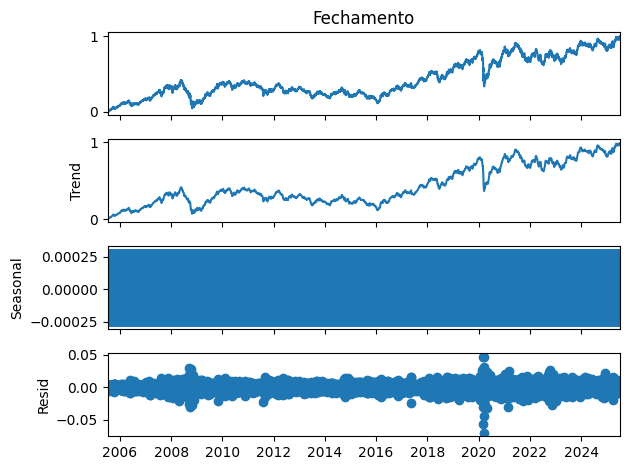

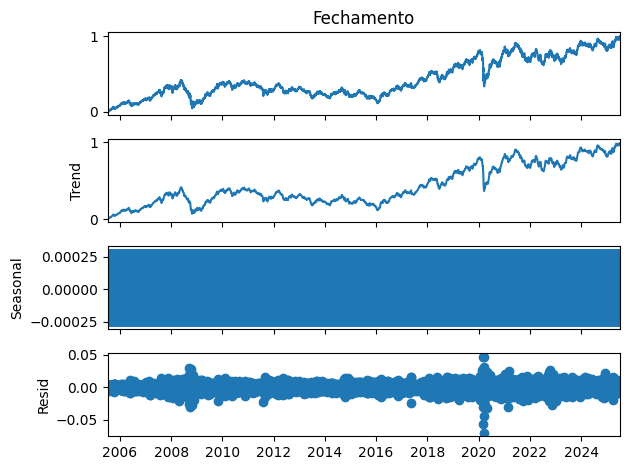

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_decompose = seasonal_decompose(df_ibovespa['Fechamento'], period=5)
df_decompose.plot()

In [26]:
#Teste de estacionariedade
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  df_adf = adfuller(timeseries, autolag='AIC')
  output = pd.Series(df_adf[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in df_adf[4].items():
    output[f'Critical Value ({key})'] = value
  print(output)
  if df_adf[1] >= 0.05:
    print("Evidências fortes para rejeitar a hipótese nula (Ho). Série não estacionária.")
  else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A série é estacionária.")
  return output

test_stationarity(df_ibovespa['Fechamento'])



Test Statistic                   -1.062253
p-value                           0.729888
#Lags Used                        8.000000
Number of Observations Used    4944.000000
Critical Value (1%)              -3.431673
Critical Value (5%)              -2.862125
Critical Value (10%)             -2.567081
dtype: float64
Evidências fortes para rejeitar a hipótese nula (Ho). Série não estacionária.


,0
Test Statistic,-1.062253
p-value,0.729888
#Lags Used,8.000000
Number of Observations Used,4944.000000
Critical Value (1%),-3.431673
Critical Value (5%),-2.862125
Critical Value (10%),-2.567081


#Utilizando modelos de Previsao de Series Temporais

## Observamos que a série temporal:

a) Não é estacionária;

b) Em sua decomposição revelou sazonalidade, tenedência e ruído.

Portanto, com a finalidade de tratar essa série, observando suas caraceterísicas, após aplicarmos outros modelos (classificação: RandoForest, LR, e KNN, e séries temporais: LSTM), optou-se por adotar o Prophet.

# O modelo Prophet

*   Gera previsões com intervalos de confiança claros e permite
incorporar sazonalidades diárias, semanais e anuais, além de pontos
de mudança (changepoints).
*  Possui robustez e flexibilidade.



#Separando o conjunto de Dados

In [28]:
# Bibliotecas básicas de data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_ibovespa, test_size=0.2, shuffle=False)

In [30]:
# Para machine learning
from sklearn.metrics import mean_squared_error

In [31]:
# Prophet
from prophet import Prophet

In [32]:
df_ibovespa.head()

,Fechamento,Abertura,Maxima,Minima,Tendencia,Volume
Data,,,,,,
2005-07-12,0.008609,0.004462,0.005803,0.005195,0,0.003816
2005-07-13,0.011351,0.009001,0.009806,0.010570,0,0.004314
2005-07-14,0.011899,0.011588,0.010654,0.012015,0,0.004558
2005-07-15,0.005919,0.012076,0.008717,0.007689,1,0.002930
2005-07-18,0.006768,0.006132,0.004397,0.005057,0,0.002098


In [33]:
#reordenar as variaveis para evitar o dataleak
df_ibovespa = df_ibovespa[['Abertura', 'Maxima', 'Minima', 'Fechamento', 'Volume','Tendencia']]
df_ibovespa.head()

,Abertura,Maxima,Minima,Fechamento,Volume,Tendencia
Data,,,,,,
2005-07-12,0.004462,0.005803,0.005195,0.008609,0.003816,0
2005-07-13,0.009001,0.009806,0.010570,0.011351,0.004314,0
2005-07-14,0.011588,0.010654,0.012015,0.011899,0.004558,0
2005-07-15,0.012076,0.008717,0.007689,0.005919,0.002930,1
2005-07-18,0.006132,0.004397,0.005057,0.006768,0.002098,0


In [34]:
df_ibovespa['Data'] = df_ibovespa.index
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4953 entries, 2005-07-12 to 2025-07-10
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Abertura    4953 non-null   float64       
 1   Maxima      4953 non-null   float64       
 2   Minima      4953 non-null   float64       
 3   Fechamento  4953 non-null   float64       
 4   Volume      4953 non-null   float64       
 5   Tendencia   4953 non-null   int64         
 6   Data        4953 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 309.6 KB


## Orgaizando o DataSet para o formato do modelo

In [35]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = df_ibovespa['Data']
df_prophet['y'] = df_ibovespa['Fechamento']
df_prophet

,ds,y
Data,,
2005-07-12,2005-07-12,0.008609
2005-07-13,2005-07-13,0.011351
2005-07-14,2005-07-14,0.011899
2005-07-15,2005-07-15,0.005919
2005-07-18,2005-07-18,0.006768
...,...,...
2025-07-04,2025-07-04,1.000000
2025-07-07,2025-07-07,0.984803
2025-07-08,2025-07-08,0.983201


## Separando o conjunto de teste

In [36]:
#Serparar o conjunto de treinto, validaçaõ e teste
data_de_corte = pd.to_datetime('2025-05-29')
treino = df_prophet.loc[df_prophet['ds'] < data_de_corte]
teste = df_prophet.loc[(df_prophet['ds'] >= data_de_corte) & (df_prophet['ds'] < data_de_corte + pd.Timedelta(days=30))]

## Treinando o Modelo Inicial

In [37]:
#Criando e treinando o modelo
modelo = Prophet(daily_seasonality=True)
modelo.fit(treino)
df_futuro = modelo.make_future_dataframe(periods=30, freq='D')
previsao = modelo.predict(df_futuro)
previsao.head()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/apt_be61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/vxm898id.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36387', 'data', 'file=/tmp/tmpw8tu4fwm/apt_be61.json', 'init=/tmp/tmpw8tu4fwm/vxm898id.json', 'output', 'file=/tmp/tmpw8tu4fwm/prophet_model8sdprz40/prophet_model-20250805181459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:15:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-12,0.010002,-0.060685,0.084252,0.010002,0.010002,-0.000745,-0.000745,-0.000745,0.006044,...,0.000290,0.000290,0.000290,-0.007079,-0.007079,-0.007079,0.0,0.0,0.0,0.009257
1,2005-07-13,0.010305,-0.065870,0.084249,0.010305,0.010305,0.000283,0.000283,0.000283,0.006044,...,0.000548,0.000548,0.000548,-0.006309,-0.006309,-0.006309,0.0,0.0,0.0,0.010589
2,2005-07-14,0.010609,-0.062375,0.084949,0.010609,0.010609,0.001090,0.001090,0.001090,0.006044,...,0.000575,0.000575,0.000575,-0.005529,-0.005529,-0.005529,0.0,0.0,0.0,0.011699
3,2005-07-15,0.010913,-0.057462,0.086127,0.010913,0.010913,0.001550,0.001550,0.001550,0.006044,...,0.000260,0.000260,0.000260,-0.004753,-0.004753,-0.004753,0.0,0.0,0.0,0.012463
4,2005-07-18,0.011824,-0.054269,0.088784,0.011824,0.011824,0.003323,0.003323,0.003323,0.006044,...,-0.000162,-0.000162,-0.000162,-0.002560,-0.002560,-0.002560,0.0,0.0,0.0,0.015146


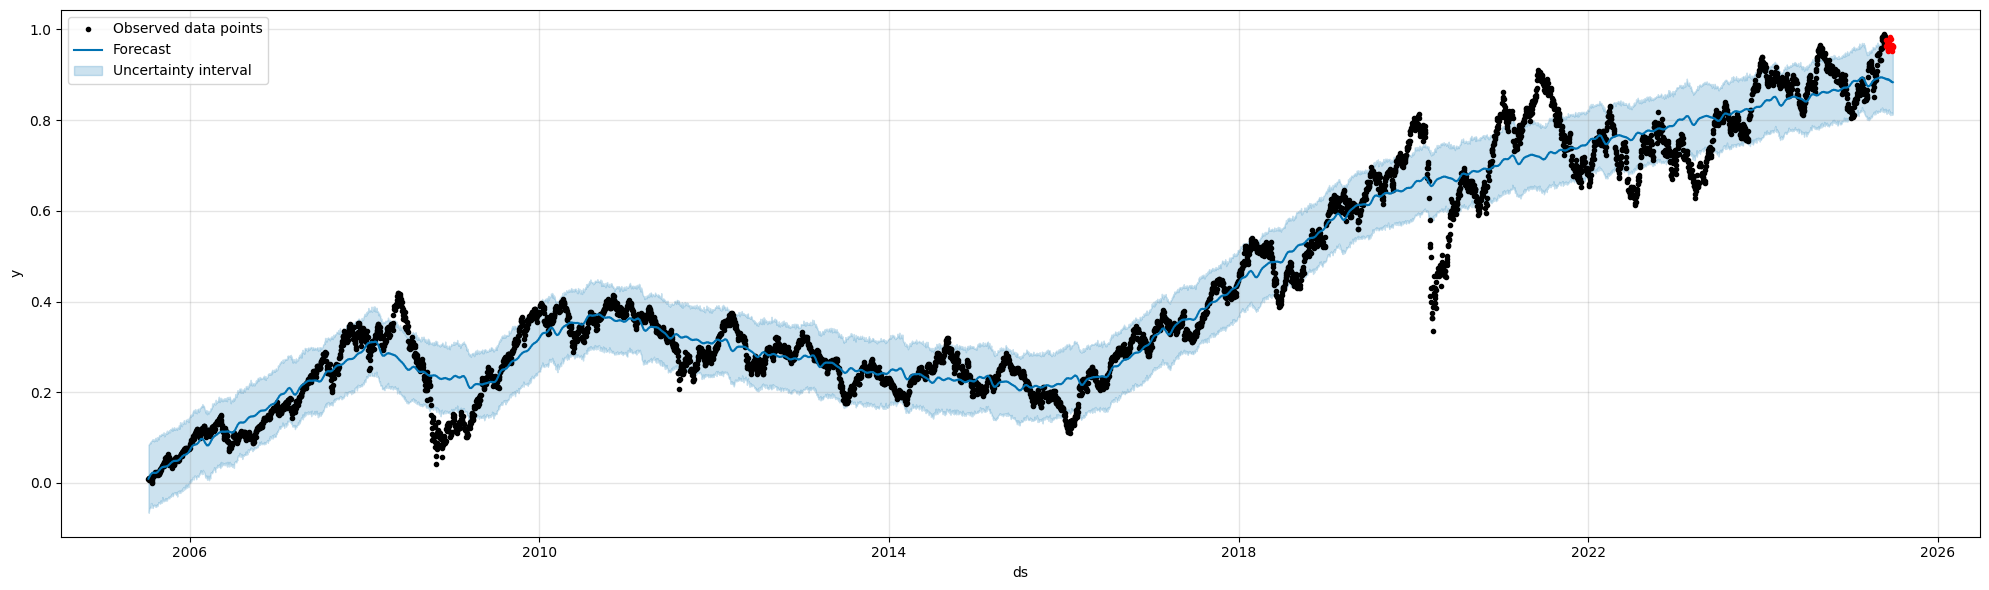

In [38]:
#Plotando o resultado
modelo.plot(previsao, figsize=(20,6));
plt.plot(teste['ds'], teste['y'], '.r')
plt.legend()

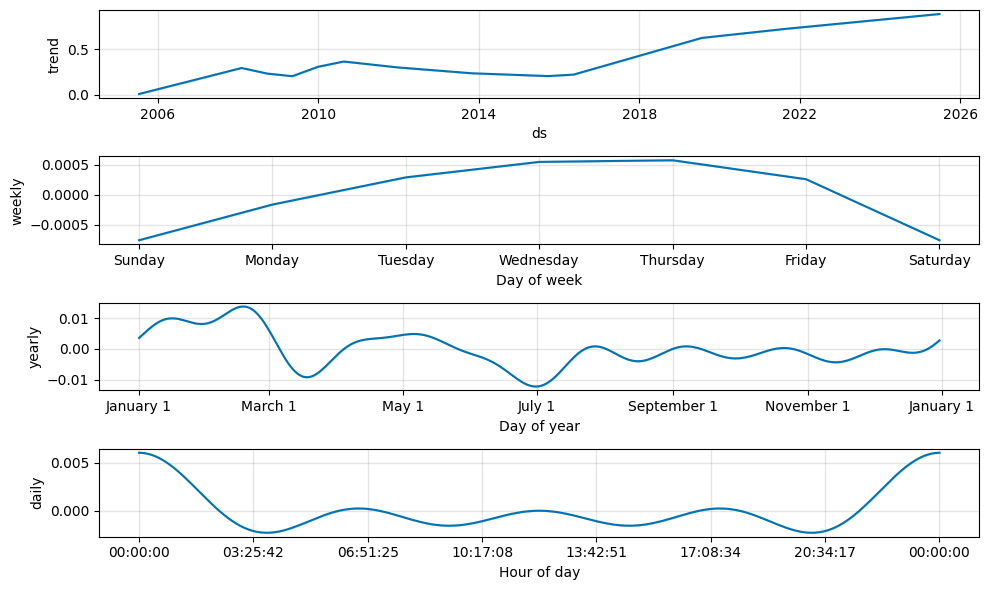

In [39]:
modelo.plot_components(previsao, figsize=(10,6));

## Adicionando os ChangePoints

In [40]:
from prophet.plot import add_changepoints_to_plot

modelo_changepoints = Prophet(n_changepoints=5)
modelo_changepoints.fit(treino)
dataFramefuture = modelo_changepoints.make_future_dataframe(periods=30, freq='D')
previsao_changepoints = modelo_changepoints.predict(dataFramefuture)
previsao_changepoints.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/x69kdlli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/w1z_h74l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55149', 'data', 'file=/tmp/tmpw8tu4fwm/x69kdlli.json', 'init=/tmp/tmpw8tu4fwm/w1z_h74l.json', 'output', 'file=/tmp/tmpw8tu4fwm/prophet_model04_b2c97/prophet_model-20250805181527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:15:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:15:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-12,0.053145,-0.035531,0.136863,0.053145,0.053145,0.000276,0.000276,0.000276,0.008574,0.008574,0.008574,-0.008298,-0.008298,-0.008298,0.0,0.0,0.0,0.053421
1,2005-07-13,0.053333,-0.032367,0.141973,0.053333,0.053333,0.001840,0.001840,0.001840,0.009445,0.009445,0.009445,-0.007605,-0.007605,-0.007605,0.0,0.0,0.0,0.055173
2,2005-07-14,0.053521,-0.029165,0.144687,0.053521,0.053521,0.002435,0.002435,0.002435,0.009335,0.009335,0.009335,-0.006900,-0.006900,-0.006900,0.0,0.0,0.0,0.055956
3,2005-07-15,0.053709,-0.034378,0.144970,0.053709,0.053709,0.002621,0.002621,0.002621,0.008814,0.008814,0.008814,-0.006194,-0.006194,-0.006194,0.0,0.0,0.0,0.056330
4,2005-07-18,0.054274,-0.030835,0.148302,0.054274,0.054274,0.004254,0.004254,0.004254,0.008431,0.008431,0.008431,-0.004177,-0.004177,-0.004177,0.0,0.0,0.0,0.058527


## Rodando o modelo com os ChangePoints

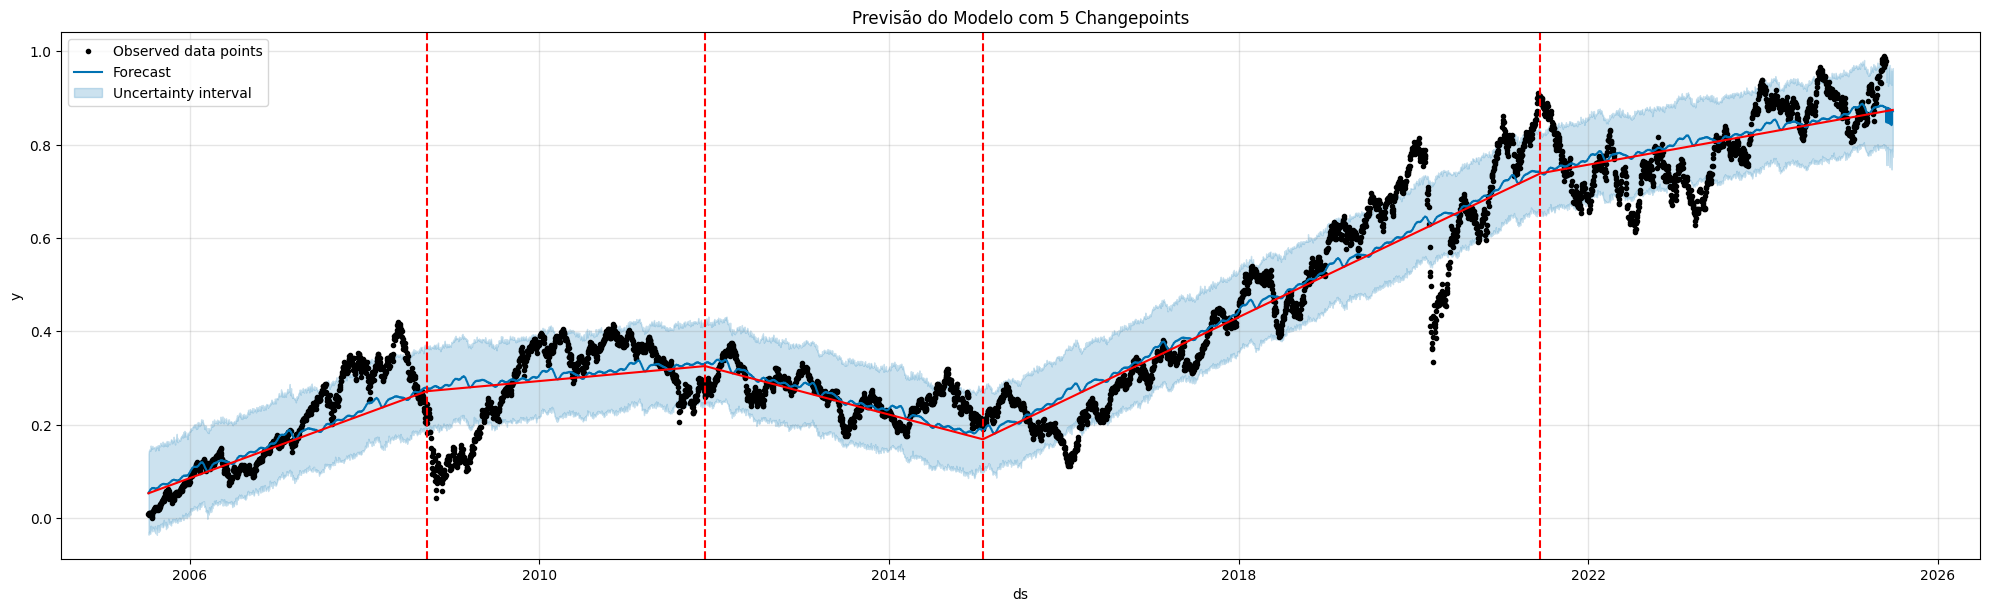

In [41]:
fig = modelo_changepoints.plot(previsao_changepoints, figsize=(20,6));
a = add_changepoints_to_plot(fig.gca(), modelo_changepoints, previsao_changepoints)
plt.title("Previsão do Modelo com 5 Changepoints")
plt.legend()
plt.show()

In [42]:
#Extrair as colunas relevantes dos DataFrames
previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

In [43]:
# Extrair as colunas relevantes dos DataFrames
previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

previsao = previsao[previsao_cols]
valores_reais = treino.reset_index()[valores_reais_cols]

# Mesclar os DataFrames nas colunas 'ds' para comparar previsões e valores reais
resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

# Calcular o erro percentual absoluto para cada ponto de dados
resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y'])

In [44]:
resultados

,ds,yhat,y,erro_percentual_absoluto
0,2005-07-12,0.009257,0.008609,0.075194
1,2005-07-13,0.010589,0.011351,0.067129
2,2005-07-14,0.011699,0.011899,0.016815
3,2005-07-15,0.012463,0.005919,1.105459
4,2005-07-18,0.015146,0.006768,1.238086
...,...,...,...,...
4918,2025-05-22,0.892805,0.965811,0.075590
4919,2025-05-23,0.892270,0.970531,0.080638
4920,2025-05-26,0.891248,0.973204,0.084212
4921,2025-05-27,0.891526,0.985240,0.095118


In [45]:
resultados.tail()

,ds,yhat,y,erro_percentual_absoluto
4918,2025-05-22,0.892805,0.965811,0.075590
4919,2025-05-23,0.892270,0.970531,0.080638
4920,2025-05-26,0.891248,0.973204,0.084212
4921,2025-05-27,0.891526,0.985240,0.095118
4922,2025-05-28,0.891623,0.979646,0.089851


In [46]:
# Mesclar os dados de teste com as previsões do modelo original
resultados_teste = pd.merge(teste, previsao, on='ds', how='inner')

# Calcular o erro percentual absoluto para os dados de teste
resultados_teste['erro_percentual_absoluto'] = np.abs((resultados_teste['y'] - resultados_teste['yhat']) / resultados_teste['y']) * 100

# Exibir as primeiras linhas do dataframe de resultados para os dados de teste
display(resultados_teste.head())

,ds,y,yhat,erro_percentual_absoluto
0,2025-05-29,0.976613,0.891504,8.714769
1,2025-05-30,0.963703,0.891054,7.538621
2,2025-06-02,0.961648,0.890275,7.421911
3,2025-06-03,0.968150,0.890613,8.008761
4,2025-06-04,0.963489,0.890752,7.549345


In [47]:
resultados_teste.head(30)

,ds,y,yhat,erro_percentual_absoluto
0,2025-05-29,0.976613,0.891504,8.714769
1,2025-05-30,0.963703,0.891054,7.538621
2,2025-06-02,0.961648,0.890275,7.421911
3,2025-06-03,0.968150,0.890613,8.008761
4,2025-06-04,0.963489,0.890752,7.549345
5,2025-06-05,0.956927,0.890653,6.925722
6,2025-06-06,0.955779,0.890199,6.861414
7,2025-06-09,0.952327,0.889250,6.623492
8,2025-06-10,0.958641,0.889478,7.214696
9,2025-06-11,0.964569,0.889483,7.784336


## Calculando a diferença entre os resultados, para dentificar a distnância das previsões

In [48]:
resultados_teste['diferenca'] = resultados_teste['y'] - resultados_teste['yhat']
display(resultados_teste)

,ds,y,yhat,erro_percentual_absoluto,diferenca
0,2025-05-29,0.976613,0.891504,8.714769,0.085110
1,2025-05-30,0.963703,0.891054,7.538621,0.072650
2,2025-06-02,0.961648,0.890275,7.421911,0.071373
3,2025-06-03,0.968150,0.890613,8.008761,0.077537
4,2025-06-04,0.963489,0.890752,7.549345,0.072737
5,2025-06-05,0.956927,0.890653,6.925722,0.066274
6,2025-06-06,0.955779,0.890199,6.861414,0.065580
7,2025-06-09,0.952327,0.889250,6.623492,0.063077
8,2025-06-10,0.958641,0.889478,7.214696,0.069163
9,2025-06-11,0.964569,0.889483,7.784336,0.075085


## Verificando o nível de acerto, de acordo com a distância entre a previsão e os valores reais

In [49]:
resultados_teste['percentual_acerto'] = 100 - resultados_teste['erro_percentual_absoluto']
display(resultados_teste.head(30))

media_acerto = resultados_teste['percentual_acerto'].mean()
print(f"\nPercentual de acerto médio: {media_acerto:.2f}%")

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664



Percentual de acerto médio: 92.03%


## Métricas de Avaliação - MAPE

In [50]:
#Calcular o MAPE
mape = np.mean(resultados_teste['erro_percentual_absoluto'])
print(f"MAPE: {mape:.2f}%")

MAPE: 7.97%


In [51]:
resultados_teste['y_diff'] = resultados_teste['y'].diff()
resultados_teste['yhat_diff'] = resultados_teste['yhat'].diff()
display(resultados_teste.head(30))

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto,y_diff,yhat_diff
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231,NaN,NaN
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379,-0.012910,-0.000450
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089,-0.002056,-0.000779
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239,0.006502,0.000338
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655,-0.004660,0.000139
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278,-0.006562,-0.000099
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586,-0.001148,-0.000454
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508,-0.003452,-0.000950
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304,0.006314,0.000228
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664,0.005928,0.000006


In [52]:
resultados_teste['y_class'] = (resultados_teste['y_diff'] > 0).astype(int)
resultados_teste['yhat_class'] = (resultados_teste['yhat_diff'] > 0).astype(int)
display(resultados_teste.head(30))

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto,y_diff,yhat_diff,y_class,yhat_class
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231,NaN,NaN,0,0
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379,-0.012910,-0.000450,0,0
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089,-0.002056,-0.000779,0,0
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239,0.006502,0.000338,1,1
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655,-0.004660,0.000139,0,1
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278,-0.006562,-0.000099,0,0
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586,-0.001148,-0.000454,0,0
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508,-0.003452,-0.000950,0,0
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304,0.006314,0.000228,1,1
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664,0.005928,0.000006,1,1


## Verificando a Acurácia do Modelo

In [53]:
from sklearn.metrics import accuracy_score

# Remover a primeira linha que contém valores NaN
resultados_teste_sem_nan = resultados_teste.dropna()

# Calcular a acurácia
acuracia = accuracy_score(resultados_teste_sem_nan['y_class'], resultados_teste_sem_nan['yhat_class'])

print(f"Acurácia do modelo na previsão de direção: {acuracia:.2%}")

Acurácia do modelo na previsão de direção: 75.00%


In [54]:
from sklearn.metrics import classification_report

# Gerar o relatório de classificação
report = classification_report(resultados_teste_sem_nan['y_class'], resultados_teste_sem_nan['yhat_class'])

print(report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20



              precision    recall  f1-score  support
0              0.785714  0.846154  0.814815    13.00
1              0.666667  0.571429  0.615385     7.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.726190  0.708791  0.715100    20.00
weighted avg   0.744048  0.750000  0.745014    20.00


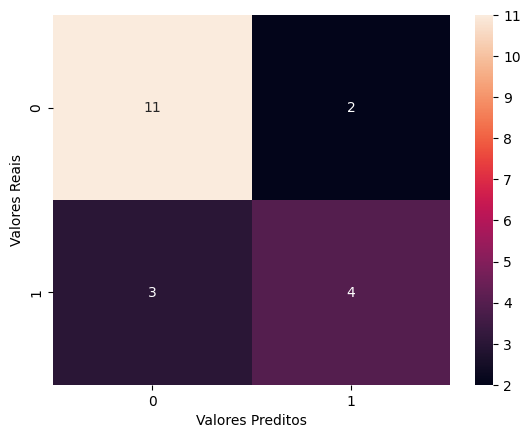

In [55]:
#Criar a matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
report = classification_report(resultados_teste_sem_nan['y_class'], resultados_teste_sem_nan['yhat_class'], output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report
print(df_classification_report)
#Fazer um plot da matriz de confusão
cm = confusion_matrix(resultados_teste_sem_nan['y_class'], resultados_teste_sem_nan['yhat_class'])
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()


## Ordenando o datachange para evitar o dataleak

In [56]:
# Ordenar o DataFrame pela data em ordem crescente
resultados_teste = resultados_teste.sort_values(by='ds').reset_index(drop=True)

# Recalcular a diferença com base na ordem cronológica correta
resultados_teste['y_diff'] = resultados_teste['y'].diff()
resultados_teste['yhat_diff'] = resultados_teste['yhat'].diff()

display(resultados_teste.head(30))

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto,y_diff,yhat_diff,y_class,yhat_class
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231,NaN,NaN,0,0
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379,-0.012910,-0.000450,0,0
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089,-0.002056,-0.000779,0,0
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239,0.006502,0.000338,1,1
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655,-0.004660,0.000139,0,1
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278,-0.006562,-0.000099,0,0
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586,-0.001148,-0.000454,0,0
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508,-0.003452,-0.000950,0,0
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304,0.006314,0.000228,1,1
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664,0.005928,0.000006,1,1


## Modelo com Alteração de Limiar (0,5)

In [57]:
# Recalcular a variação percentual diária com base nos valores corrigidos
resultados_teste['y_pct_change'] = (resultados_teste['y_diff'] / resultados_teste['y'].shift(1)) * 100
resultados_teste['yhat_pct_change'] = (resultados_teste['yhat_diff'] / resultados_teste['yhat'].shift(1)) * 100

# Criar a nova classificação com o limiar de 0.5%
limiar_percentual = 0.5
resultados_teste['y_class_new'] = (resultados_teste['y_pct_change'] > limiar_percentual).astype(int)
resultados_teste['yhat_class_new'] = (resultados_teste['yhat_pct_change'] > limiar_percentual).astype(int)

display(resultados_teste.head(30))

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto,y_diff,yhat_diff,y_class,yhat_class,y_pct_change,yhat_pct_change,y_class_new,yhat_class_new
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231,NaN,NaN,0,0,NaN,NaN,0,0
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379,-0.012910,-0.000450,0,0,-1.321895,-0.050495,0,0
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089,-0.002056,-0.000779,0,0,-0.213341,-0.087384,0,0
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239,0.006502,0.000338,1,1,0.676133,0.037950,1,0
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655,-0.004660,0.000139,0,1,-0.481352,0.015657,0,0
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278,-0.006562,-0.000099,0,0,-0.681064,-0.011111,0,0
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586,-0.001148,-0.000454,0,0,-0.119959,-0.050949,0,0
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508,-0.003452,-0.000950,0,0,-0.361205,-0.106678,0,0
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304,0.006314,0.000228,1,1,0.662961,0.025623,1,0
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664,0.005928,0.000006,1,1,0.618382,0.000652,1,0


* Verificando a Acurácia

In [58]:
from sklearn.metrics import accuracy_score

# Remover as linhas que contêm valores NaN
resultados_teste_sem_nan_new = resultados_teste.dropna()

# Calcular a acurácia da nova classificação
acuracia_new = accuracy_score(resultados_teste_sem_nan_new['y_class_new'], resultados_teste_sem_nan_new['yhat_class_new'])

print(f"Acurácia do modelo com limiar de 0.5% (corrigido): {acuracia_new:.2%}")

Acurácia do modelo com limiar de 0.5% (corrigido): 65.00%


In [59]:
from sklearn.metrics import classification_report

# Gerar o relatório de classificação para a nova classe com dados corrigidos
report_new_corrected = classification_report(resultados_teste_sem_nan_new['y_class_new'], resultados_teste_sem_nan_new['yhat_class_new'])

print(report_new_corrected)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Observamos a queda na Acurácia - 65%.

## Reavaliação do Modelo Original com novas Features

In [60]:
# Recalcular a classificação direcional com base nos dados corrigidos
resultados_teste['y_class'] = (resultados_teste['y_diff'] > 0).astype(int)
resultados_teste['yhat_class'] = (resultados_teste['yhat_diff'] > 0).astype(int)

# Remover as linhas que contêm valores NaN
resultados_teste_sem_nan_class = resultados_teste.dropna()

# Calcular a acurácia da classificação direcional
acuracia_class = accuracy_score(resultados_teste_sem_nan_class['y_class'], resultados_teste_sem_nan_class['yhat_class'])
print(f"Acurácia da classificação direcional (corrigido): {acuracia_class:.2%}\n")

# Gerar o relatório de classificação direcional
report_class = classification_report(resultados_teste_sem_nan_class['y_class'], resultados_teste_sem_nan_class['yhat_class'])
print(report_class)

Acurácia da classificação direcional (corrigido): 75.00%

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20



## Recalculando os dados, com as novas "features", no modelo original, alcançamos a acurácia de 75%.

#Criando um modelo com periodicidade diária

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/885dduu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/exyxggne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33568', 'data', 'file=/tmp/tmpw8tu4fwm/885dduu1.json', 'init=/tmp/tmpw8tu4fwm/exyxggne.json', 'output', 'file=/tmp/tmpw8tu4fwm/prophet_modelxoy_anas/prophet_model-20250805181744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


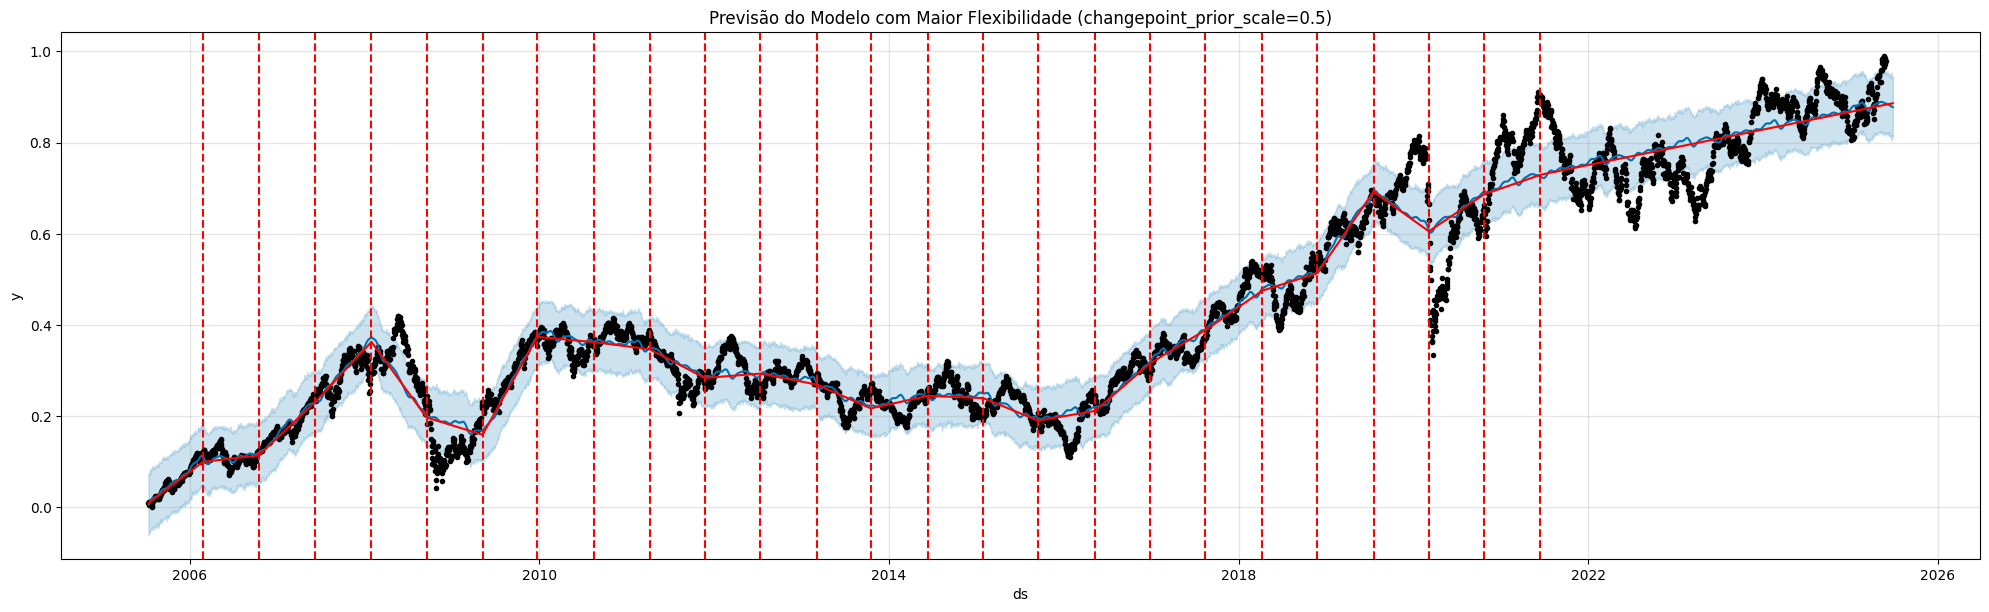

In [61]:
from prophet.plot import add_changepoints_to_plot

# Criar um novo modelo com maior sensibilidade
modelo_flexivel = Prophet(changepoint_prior_scale=0.5, daily_seasonality=True)

# Treinar o novo modelo
modelo_flexivel.fit(treino)

# Fazer a previsão com o novo modelo
df_futuro_flexivel = modelo_flexivel.make_future_dataframe(periods=30, freq='D')
previsao_flexivel = modelo_flexivel.predict(df_futuro_flexivel)

# Plotar o gráfico do novo modelo
fig = modelo_flexivel.plot(previsao_flexivel, figsize=(20,6))
a = add_changepoints_to_plot(fig.gca(), modelo_flexivel, previsao_flexivel)
plt.title("Previsão do Modelo com Maior Flexibilidade (changepoint_prior_scale=0.5)")
plt.show()

In [62]:
# 1. Mesclar os dados de teste com as previsões do modelo flexível
resultados_teste_flexivel = pd.merge(teste, previsao_flexivel, on='ds', how='inner')

# 2. Ordenar o DataFrame pela data em ordem crescente
resultados_teste_flexivel = resultados_teste_flexivel.sort_values(by='ds').reset_index(drop=True)

# 3. Recalcular a diferença com base na ordem cronológica correta
resultados_teste_flexivel['y_diff'] = resultados_teste_flexivel['y'].diff()
resultados_teste_flexivel['yhat_diff'] = resultados_teste_flexivel['yhat'].diff()

# 4. Recalcular a classificação direcional
resultados_teste_flexivel['y_class'] = (resultados_teste_flexivel['y_diff'] > 0).astype(int)
resultados_teste_flexivel['yhat_class'] = (resultados_teste_flexivel['yhat_diff'] > 0).astype(int)

# 5. Remover as linhas que contêm valores NaN
resultados_teste_flexivel_sem_nan = resultados_teste_flexivel.dropna()

# 6. Calcular a acurácia da nova classificação direcional
acuracia_flexivel = accuracy_score(resultados_teste_flexivel_sem_nan['y_class'], resultados_teste_flexivel_sem_nan['yhat_class'])
print(f"Acurácia do Modelo Flexível (corrigido): {acuracia_flexivel:.2%}\n")

# 7. Gerar o relatório de classificação direcional
report_flexivel = classification_report(resultados_teste_flexivel_sem_nan['y_class'], resultados_teste_flexivel_sem_nan['yhat_class'])
print("Relatório de Classificação do Modelo Flexível:")
print(report_flexivel)

Acurácia do Modelo Flexível (corrigido): 80.00%

Relatório de Classificação do Modelo Flexível:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.43      0.60         7

    accuracy                           0.80        20
   macro avg       0.88      0.71      0.73        20
weighted avg       0.85      0.80      0.77        20



# O último modelo criado, com periodicidade diária, alcançou melhor performace - 80% de acurácia.

## Calculando o modelo de periodicidade mensal

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/6nwrai38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/gcp8s3j8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78706', 'data', 'file=/tmp/tmpw8tu4fwm/6nwrai38.json', 'init=/tmp/tmpw8tu4fwm/gcp8s3j8.json', 'output', 'file=/tmp/tmpw8tu4fwm/prophet_model9j_uw0to/prophet_model-20250805181823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:18:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


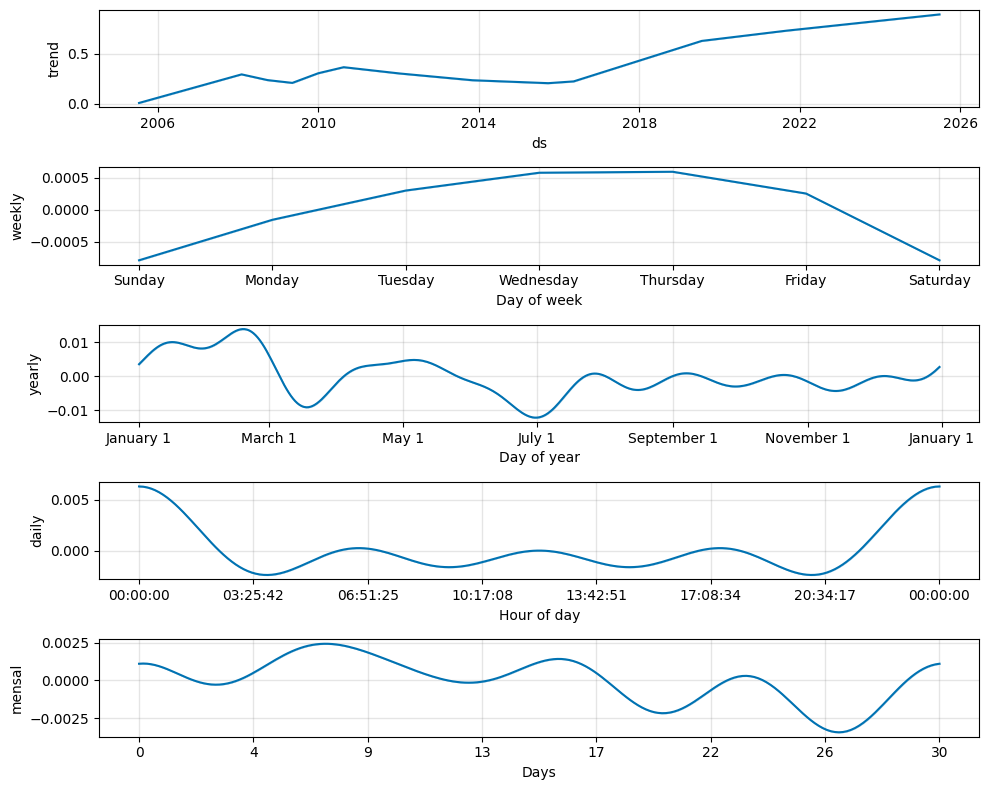

In [63]:
# Criar um novo modelo com sazonalidade mensal
modelo_mensal = Prophet(daily_seasonality=True)
modelo_mensal.add_seasonality(name='mensal', period=30.5, fourier_order=5)

# Treinar o novo modelo
modelo_mensal.fit(treino)

# Fazer a previsão com o novo modelo
df_futuro_mensal = modelo_mensal.make_future_dataframe(periods=30, freq='D')
previsao_mensal = modelo_mensal.predict(df_futuro_mensal)

# Plotar os componentes do novo modelo
fig = modelo_mensal.plot_components(previsao_mensal, figsize=(10,8))
plt.show()

In [64]:
# 1. Mesclar os dados de teste com as previsões do modelo com sazonalidade mensal
resultados_teste_mensal = pd.merge(teste, previsao_mensal, on='ds', how='inner')

# 2. Ordenar o DataFrame pela data em ordem crescente
resultados_teste_mensal = resultados_teste_mensal.sort_values(by='ds').reset_index(drop=True)

# 3. Recalcular a diferença com base na ordem cronológica correta
resultados_teste_mensal['y_diff'] = resultados_teste_mensal['y'].diff()
resultados_teste_mensal['yhat_diff'] = resultados_teste_mensal['yhat'].diff()

# 4. Recalcular a classificação direcional
resultados_teste_mensal['y_class'] = (resultados_teste_mensal['y_diff'] > 0).astype(int)
resultados_teste_mensal['yhat_class'] = (resultados_teste_mensal['yhat_diff'] > 0).astype(int)

# 5. Remover as linhas que contêm valores NaN
resultados_teste_mensal_sem_nan = resultados_teste_mensal.dropna()

# 6. Calcular a acurácia da nova classificação direcional
acuracia_mensal = accuracy_score(resultados_teste_mensal_sem_nan['y_class'], resultados_teste_mensal_sem_nan['yhat_class'])
print(f"Acurácia do Modelo com Sazonalidade Mensal (corrigido): {acuracia_mensal:.2%}\n")

# 7. Gerar o relatório de classificação direcional
report_mensal = classification_report(resultados_teste_mensal_sem_nan['y_class'], resultados_teste_mensal_sem_nan['yhat_class'])
print("Relatório de Classificação do Modelo com Sazonalidade Mensal:")
print(report_mensal)

Acurácia do Modelo com Sazonalidade Mensal (corrigido): 50.00%

Relatório de Classificação do Modelo com Sazonalidade Mensal:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.29      0.29      0.29         7

    accuracy                           0.50        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.50      0.50      0.50        20




- O resultado é muito inferior ao modelo de periodicidade diáradians

## Criando um modelo considerando os feriados brasileiros

In [65]:
# Criar um novo modelo com feriados brasileiros
modelo_feriados = Prophet(daily_seasonality=True)
modelo_feriados.add_country_holidays(country_name='BR')

# Treinar o novo modelo
modelo_feriados.fit(treino)

# Fazer a previsão com o novo modelo
df_futuro_feriados = modelo_feriados.make_future_dataframe(periods=30, freq='D')
previsao_feriados = modelo_feriados.predict(df_futuro_feriados)

# Avaliar o modelo com feriados
# 1. Mesclar os dados de teste com as previsões
resultados_teste_feriados = pd.merge(teste, previsao_feriados, on='ds', how='inner')

# 2. Ordenar o DataFrame pela data em ordem crescente
resultados_teste_feriados = resultados_teste_feriados.sort_values(by='ds').reset_index(drop=True)

# 3. Recalcular a diferença com base na ordem cronológica correta
resultados_teste_feriados['y_diff'] = resultados_teste_feriados['y'].diff()
resultados_teste_feriados['yhat_diff'] = resultados_teste_feriados['yhat'].diff()

# 4. Recalcular a classificação direcional
resultados_teste_feriados['y_class'] = (resultados_teste_feriados['y_diff'] > 0).astype(int)
resultados_teste_feriados['yhat_class'] = (resultados_teste_feriados['yhat_diff'] > 0).astype(int)

# 5. Remover as linhas que contêm valores NaN
resultados_teste_feriados_sem_nan = resultados_teste_feriados.dropna()

# 6. Calcular a acurácia da nova classificação direcional
acuracia_feriados = accuracy_score(resultados_teste_feriados_sem_nan['y_class'], resultados_teste_feriados_sem_nan['yhat_class'])
print(f"Acurácia do Modelo com Feriados (corrigido): {acuracia_feriados:.2%}\n")

# 7. Gerar o relatório de classificação direcional
report_feriados = classification_report(resultados_teste_feriados_sem_nan['y_class'], resultados_teste_feriados_sem_nan['yhat_class'])
print("Relatório de Classificação do Modelo com Feriados:")
print(report_feriados)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/q2ld1iys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/bknab5yd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55540', 'data', 'file=/tmp/tmpw8tu4fwm/q2ld1iys.json', 'init=/tmp/tmpw8tu4fwm/bknab5yd.json', 'output', 'file=/tmp/tmpw8tu4fwm/prophet_modelpsfo513w/prophet_model-20250805181851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Acurácia do Modelo com Feriados (corrigido): 75.00%

Relatório de Classificação do Modelo com Feriados:
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20



## O modelo considerando os feriados brasileiros alcançou acurácia semelhante ao modelo original - em torno de 75%

## Validação Cruzada

In [66]:
from prophet.diagnostics import cross_validation
df_cv= cross_validation(modelo_flexivel, initial='500 days', period='120 days', horizon = '180 days')

INFO:prophet:Making 55 forecasts with cutoffs between 2007-03-04 00:00:00 and 2024-11-29 00:00:00


  0%|          | 0/55 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/buo680k8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/azm1z2f7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75718', 'data', 'file=/tmp/tmpw8tu4fwm/buo680k8.json', 'init=/tmp/tmpw8tu4fwm/azm1z2f7.json', 'output', 'file=/tmp/tmpw8tu4fwm/prophet_modelqx7nps18/prophet_model-20250805182040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:20:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:20:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/5jfim7zv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/pg9q6s4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [67]:
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2007-03-05,0.170055,0.162042,0.178150,0.142616,2007-03-04
1,2007-03-06,0.169636,0.161991,0.177072,0.160083,2007-03-04
2,2007-03-07,0.169853,0.162524,0.178329,0.155363,2007-03-04
3,2007-03-08,0.169331,0.161767,0.177512,0.162208,2007-03-04
4,2007-03-09,0.168998,0.161338,0.177042,0.167922,2007-03-04


In [68]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(modelo_flexivel, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/3ps3xraq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/nrpxgedy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73049', 'data', 'file=/tmp/tmpw8tu4fwm/3ps3xraq.json', 'init=/tmp/tmpw8tu4fwm/nrpxgedy.json', 'output', 'file=/tmp/tmpw8tu4fwm/prophet_modelskdo5o3q/prophet_model-20250805182341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:23:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:23:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/ekmxcnph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8tu4fwm/h2ap261s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [69]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,19 days,0.003883,0.062317,0.044555,0.120675,0.082953,0.115847,0.477585
1,20 days,0.004023,0.063430,0.045213,0.122083,0.083501,0.117164,0.470318
2,21 days,0.004164,0.064526,0.046040,0.121290,0.084167,0.117685,0.467213
3,22 days,0.004259,0.065264,0.046810,0.121103,0.086241,0.118262,0.463487
4,23 days,0.004312,0.065669,0.047349,0.120863,0.084371,0.118845,0.461997


In [70]:
from prophet.diagnostics import register_performance_metric, rolling_mean_by_h
import numpy as np
@register_performance_metric
def mase(df, w):
    """Mean absolute scale error

        Parameters
        ----------
        df: Cross-validation results dataframe.
        w: Aggregation window size.

        Returns
        -------
        Dataframe with columns horizon and mase.
    """
    e = (df['y'] - df['yhat'])
    d = np.abs(np.diff(df['y'])).sum()/(df['y'].shape[0]-1)
    se = np.abs(e/d)
    if w < 0:
        return pd.DataFrame({'horizon': df['horizon'], 'mase': se})
    return rolling_mean_by_h(
        x=se.values, h=df['horizon'].values, w=w, name='mase'
    )

df_mase = performance_metrics(df_cv, metrics=['mase'])
df_mase.head()

,horizon,mase
0,19 days,0.165127
1,20 days,0.167568
2,21 days,0.170631
3,22 days,0.173484
4,23 days,0.175481


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


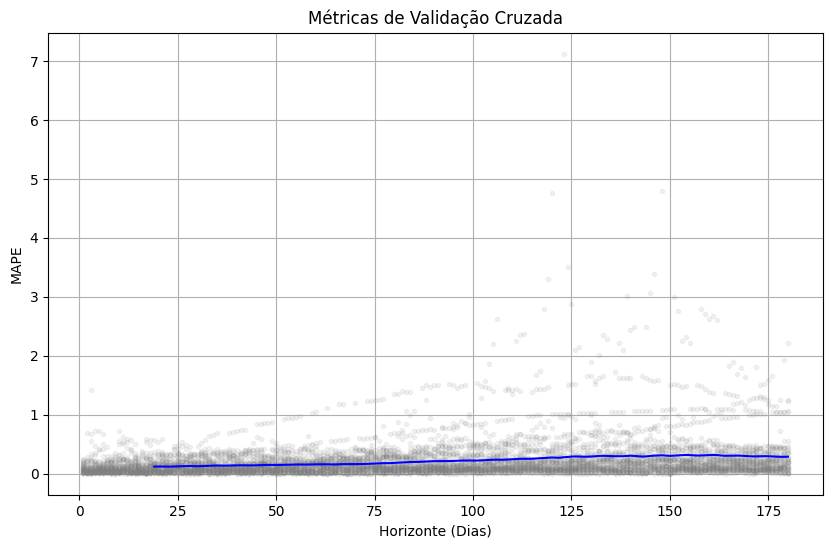

In [74]:
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.legend import Legend

fig = plot_cross_validation_metric(df_cv, metric='mape')
ax = fig.gca() # Get the axes from the figure
ax.set_xlabel('Horizonte (Dias)')
ax.set_ylabel('MAPE')
ax.set_title('Métricas de Validação Cruzada')
plt.show()

#Com a validação cruzada, observamos um desempenho constante entre os períodos de teste da validação cruzada, com baixo desvio padrão, sinalizando que o modelo tem possível confiabilidade. A faixa azul mais estreita indica maior confiança nas previsões.